In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil

In [57]:
df = pd.read_csv('Wiek.csv')

In [58]:
df_long = pd.melt(df, id_vars=['Timestamp'], var_name='Name', value_name='Value')
df_long['Name'] = df_long['Name'].str.extract(r'\[([\w]+)\]')
grouped = df_long.groupby(['Name', 'Value']).Timestamp.nunique().reset_index(name='Count')

In [59]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 20})

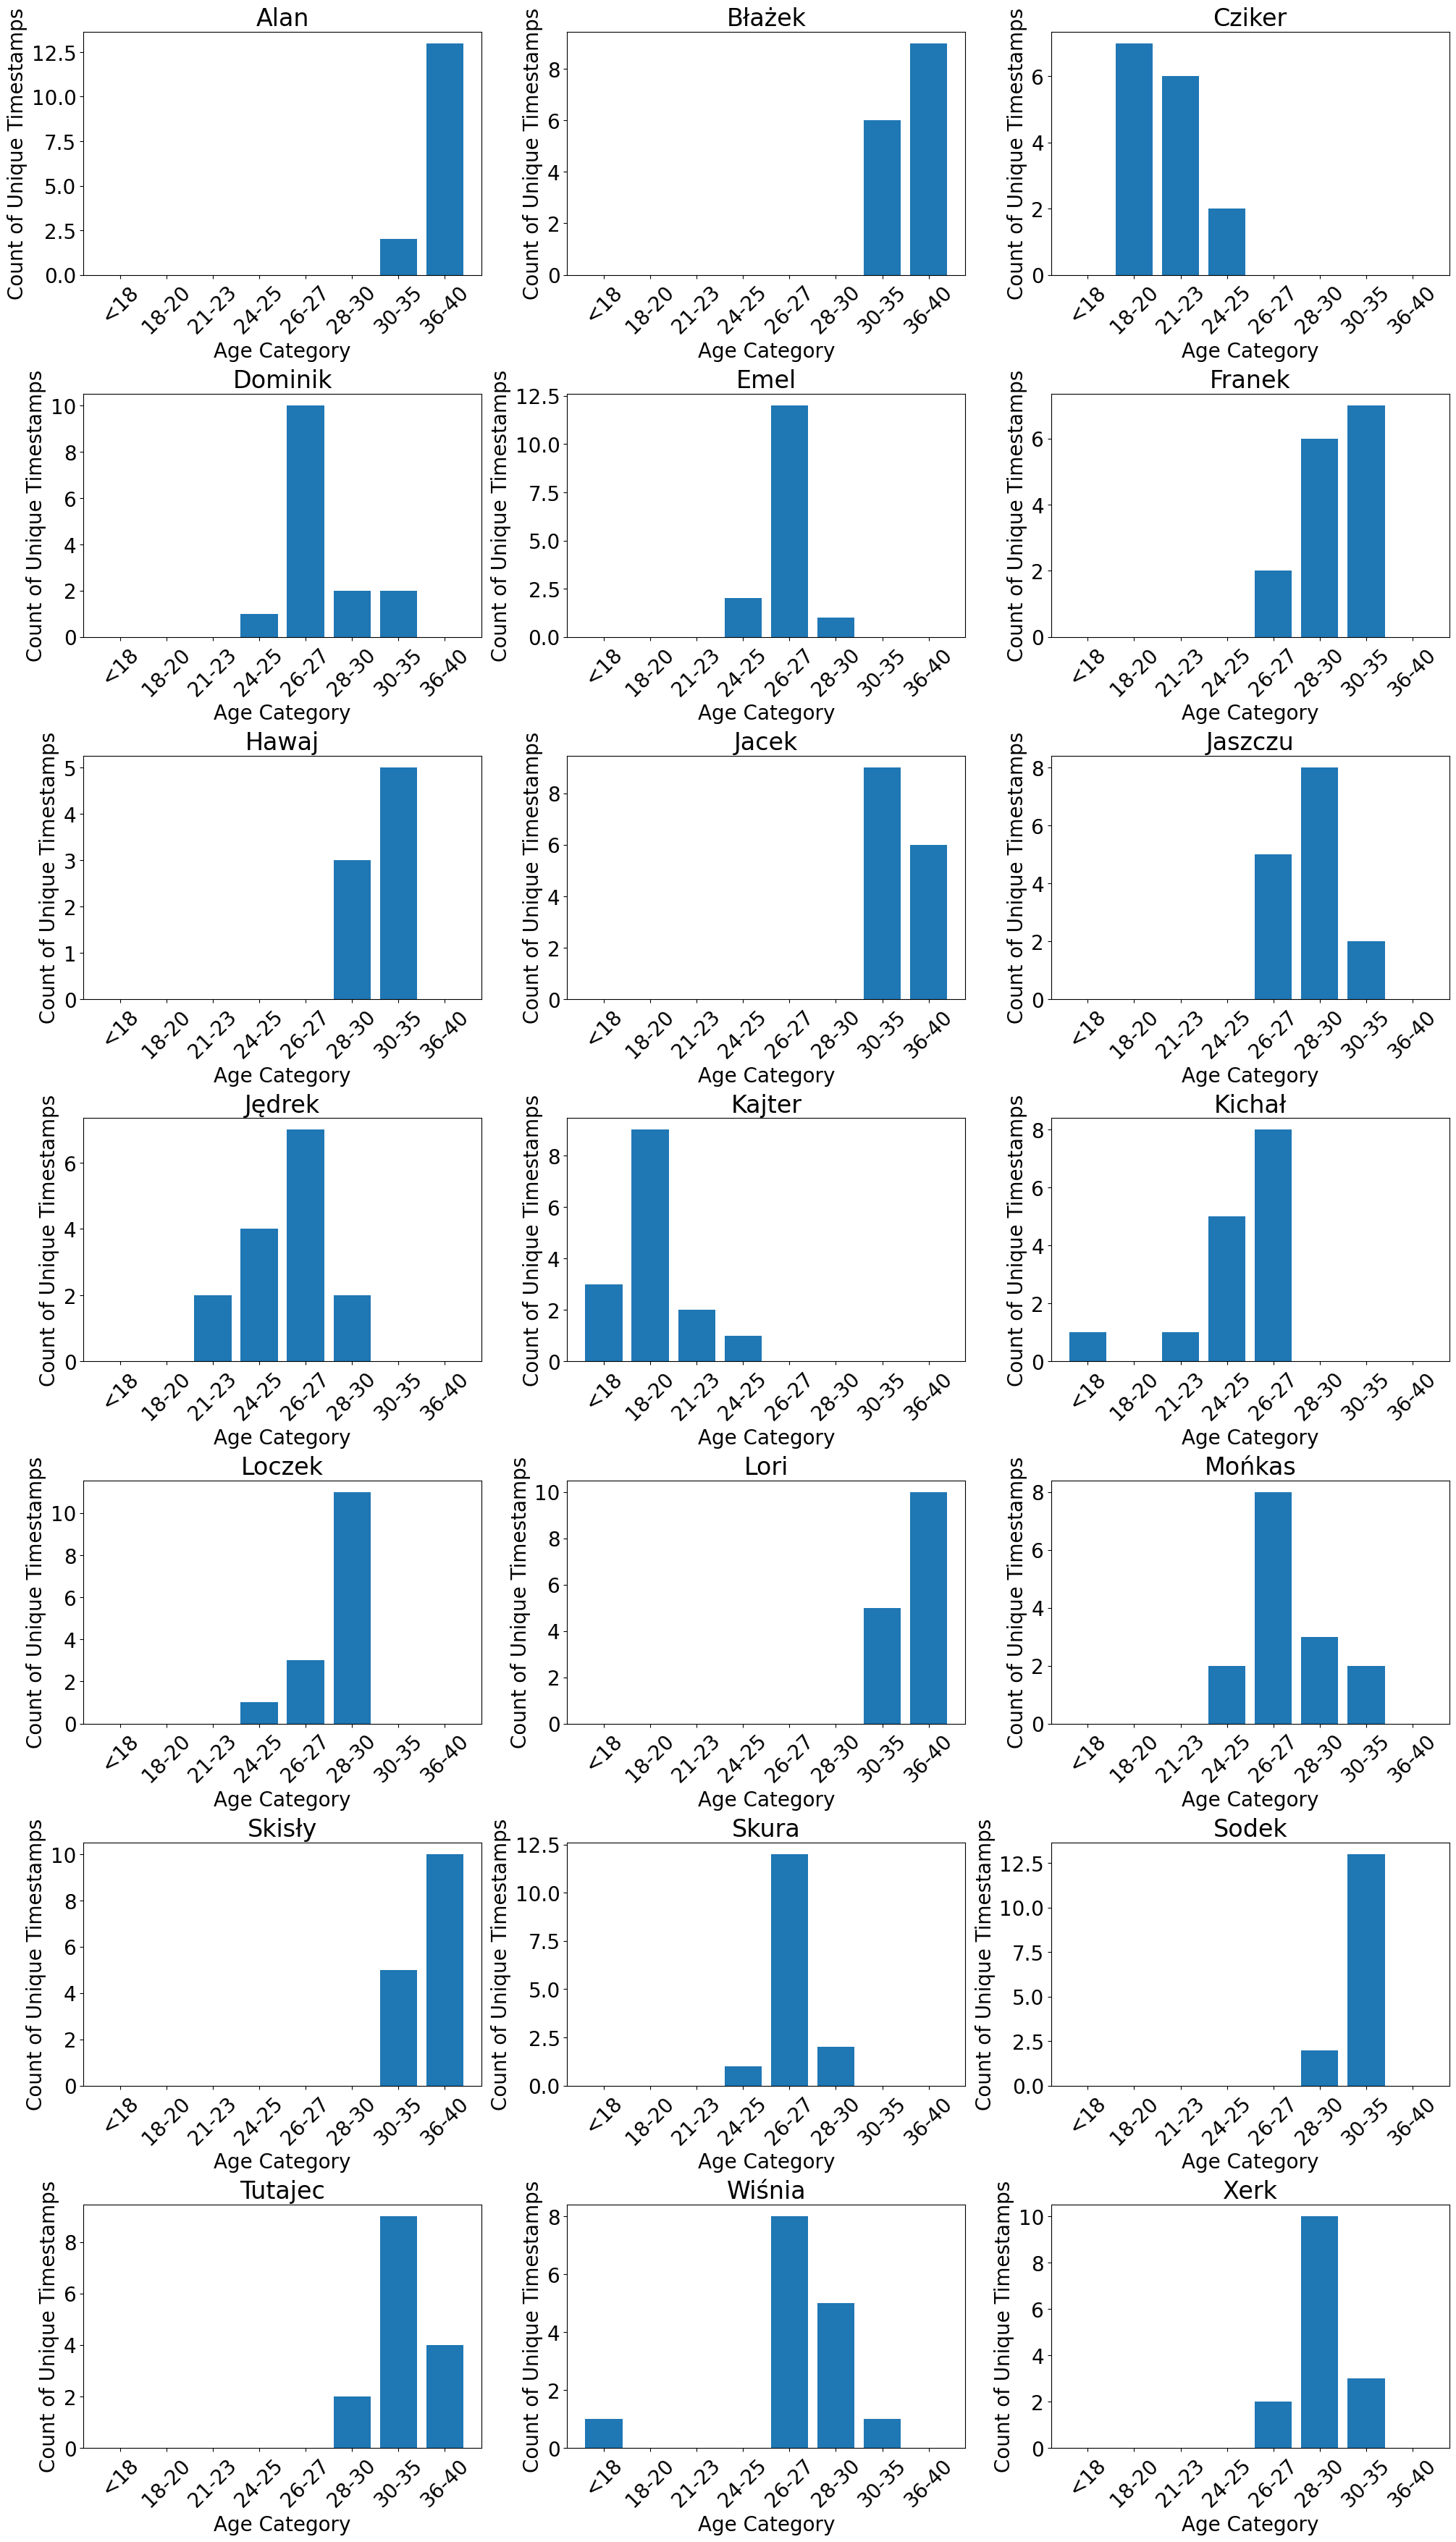

In [60]:
age_categories = ['<18', '18-20', '21-23', '24-25', '26-27', '28-30', '30-35', '36-40']

num_names = grouped['Name'].nunique()
num_columns = 3
num_rows = ceil(num_names / num_columns)
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5), constrained_layout=True)
axes = axes.flatten() 

for i, name in enumerate(grouped['Name'].unique()):
    ax = axes[i]
    subset = grouped[grouped['Name'] == name].set_index('Value').reindex(age_categories, fill_value=0).reset_index()
    ax.bar(subset['Value'], subset['Count'])
    ax.set_title(f'{name}')
    ax.set_xlabel('Age Category')
    ax.set_ylabel('Count of Unique Timestamps')
    ax.set_xticklabels(subset['Value'], rotation=45)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.show()